In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 

# Exercise 1

In [234]:
P = [ 
    [0.1, 0.1, 0.5, 0.2, 0.1],
    [0.3, 0.1, 0.1, 0.4, 0.1],
    [0.2, 0.1, 0.1, 0.5, 0.1],
    [0.1, 0.1, 0.1, 0.6, 0.1],
    [0.1, 0.2, 0.1, 0.4, 0.2],
]

## 1. Sample a path of size N = 100

In [235]:
def generate_next_step(support_list, probab_list):
    # res = []
    C_list = np.cumsum(probab_list)
    #C_list = [sum(probab_list[0:(i+1)]) for i in range(len(proba_list))]
    # for _ in range(size):
    k = 0
    U = np.random.rand()
    while (U > C_list[k] and k < len(probab_list)): #cardinality N = len(probab_list)
        k += 1
        # res.append(support_list[k])
    return support_list[k]

In [236]:
#1. Sample a path of size N = 100

N = 100
E = [1,2,3,4,5] #support
x0 = E[0]
random_walk = [x0]

for _ in range(N): 
    random_walk.append(generate_next_step(E, P[random_walk[-1]-1])) #take P[current_state][j]

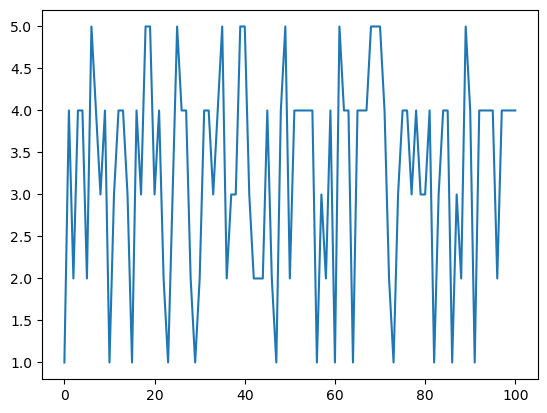

In [237]:
plt.plot([i for i in range(N+1)], [_ for _ in random_walk])

In [238]:
def count_state(walk, E):
    count  = []
    for state in E:
        count.append(walk.count(state))
    return count

In [239]:
count_state(random_walk, E)

[13, 15, 17, 43, 13]

In [240]:
for e in E:
    print(f"{sum([c==e for c in random_walk])}")

13
15
17
43
13


#### State 4: 46 is the highest

## 2. Compute unique invariant probability

In [241]:
def probab_invariant(P):
    P = np.asarray(P)
    size = np.shape(P)[0] #get size
    A = np.append(np.transpose(P) - np.identity(5), np.ones([1,5]), axis = 0)  #append 1 row 5 columns to matrix P-I
    B = np.append(np.zeros((size,1)), [[1]], axis = 0) #a vector for size rows 1 column
    # B = np.zeros(size)
    # B = np.transpose(np.append(B,1))
    pi = np.linalg.solve((np.dot(np.transpose(A), A)), np.dot(np.transpose(A), B))
    return np.transpose(pi)

In [242]:
probab_invariant(P)

array([[0.13773148, 0.11111111, 0.15509259, 0.4849537 , 0.11111111]])

## 3. Find approximation of $\pi$

In [243]:
N = 10**5
E = [1,2,3,4,5] #support
x0 = E[0]
chain = [x0]

for _ in range(N): 
    chain.append(generate_next_step(E, P[chain[-1]-1])) #take P[current_state][j]

In [271]:
pi_approx = []
for x in E:
    sum = 0
    for _ in range(0,N):
        sum += int(chain[_] == x)
    pi_approx.append(sum/(N-1))

In [272]:
pi_approx

[0.13582135821358213,
 0.11079110791107911,
 0.15432154321543215,
 0.4867548675486755,
 0.11232112321123211]

In [336]:
def transition_matrix(chain, state_list):
    size = len(state_list)
    P = np.zeros((size,size))
    
    for i in range(len(chain)-1): # -1 because we stop at current = n-1, next = n
        current = chain[i] # current is the state wrt to E = [1,...,5] 
        next = chain[i+1] # so have to -1 for P's index
        P[current - 1][next - 1] += 1

    for i in range(size):
        sum_ = np.sum(P[i]) # find total trajectory of each state 
        P[i] /= sum_

    return P

In [339]:
transition_matrix(chain, E)

array([[0.09807098, 0.09659844, 0.49911648, 0.20409365, 0.10212045],
       [0.29876343, 0.09612781, 0.09739146, 0.40590306, 0.10181424],
       [0.19848367, 0.10082945, 0.10478227, 0.49572317, 0.10018144],
       [0.09888033, 0.09972265, 0.10017463, 0.6003698 , 0.10085259],
       [0.09464031, 0.20414886, 0.09624288, 0.40357906, 0.20138889]])

# Exercise 3

In [3]:
def one_sample_uniform(increased_support_list):
    k = 0
    U = np.random.rand()
    sum_proba = 1 / len(increased_support_list)
    while (U > sum_proba):
        k += 1
        sum_proba += 1 / len(increased_support_list)

    return increased_support_list[k]

def sample_abs_std_normal(N):
    res = []

    f = lambda x : 2 / np.sqrt(2*np.pi) * np.exp(-x**2/2) * int(x>0)
    g = lambda x : np.exp(-x) * int(x>0)
    inv_cdf_g = lambda x : -np.log(1-x) * int(x>0 and x<1)
    c = np.sqrt(2 * np.e / np.pi)

    for _ in range(N):
        while True:
            U = np.random.rand()

            U_ = np.random.rand()
            Y = inv_cdf_g(U_)

            if U < f(Y) / (c * g(Y)):
                break
        res.append(Y)
    
    return res

def sample_std_normal(N):
    return [one_sample_uniform([-1,1]) * i for i in sample_abs_std_normal(N)]

def sample_normal(mu, sigma, N):
    return [(_ * sigma) + mu for _ in sample_std_normal(N)]

def normal_density(mu, sigma, x):
    return ( 1/np.sqrt(2*np.pi)*sigma**2 * np.exp(-(x-mu)**2/2*sigma**2) )

## Q2 plot function x -> $\tilde{\pi}$

In [344]:
pi_tilde = lambda x : math.sin(x)**2 * math.sin(2*x)**2 * normal_density(0, 1, x)

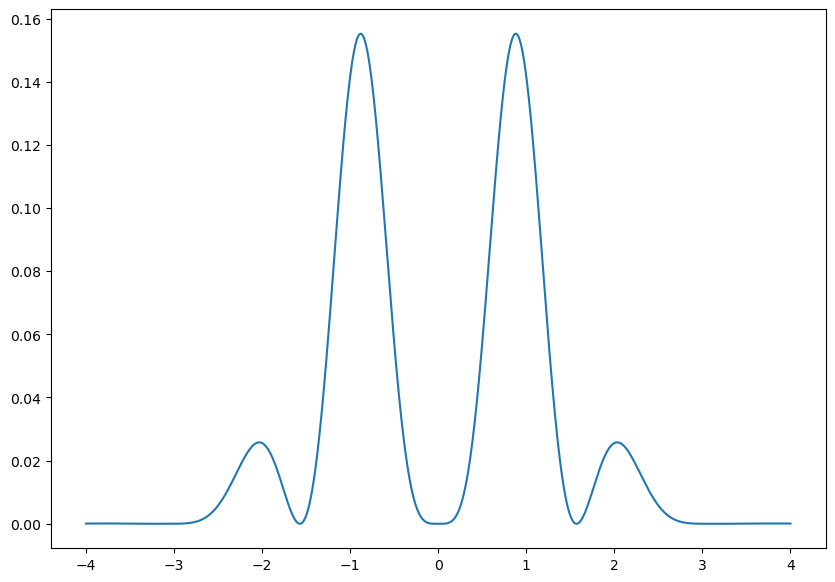

In [356]:
plt.figure(figsize=(10,7))

x = np.linspace(-4, 4, 1000)
y = [pi_tilde(x_) for x_ in x]
plt.plot(x, y)

## Q3 implement H-M algo

In [449]:
def generate_Q(x, alpha):
    def unifab_va(a,b):
        return min(a,b)+(max(a,b)-min(a,b))*np.random.rand()
    y = unifab_va(x-alpha, x+alpha)
    return y

In [481]:
def generate_next_HM(curr_x, alpha):

    def h(x,y): #Q is symmetric
        res = min(1, pi_tilde(y)/ pi_tilde(x))
        if ((pi_tilde(x) * generate_Q(x, y)) == 0):
            return 1
        else: 
            return res

    U = np.random.rand()
    Y = generate_Q(curr_x, alpha)

    if (U <= h(curr_x, Y)):
        return Y
    else:
        return curr_x
    
def HM_algo(x0, alpha, size):
    res = [x0]
    for _ in range(size - 1):
        res.append(generate_next_HM(res[-1], alpha))
    return res

In [678]:
alpha = 1
x0 = 3.24
N = 10**5

HM = HM_algo(x0, alpha, N)

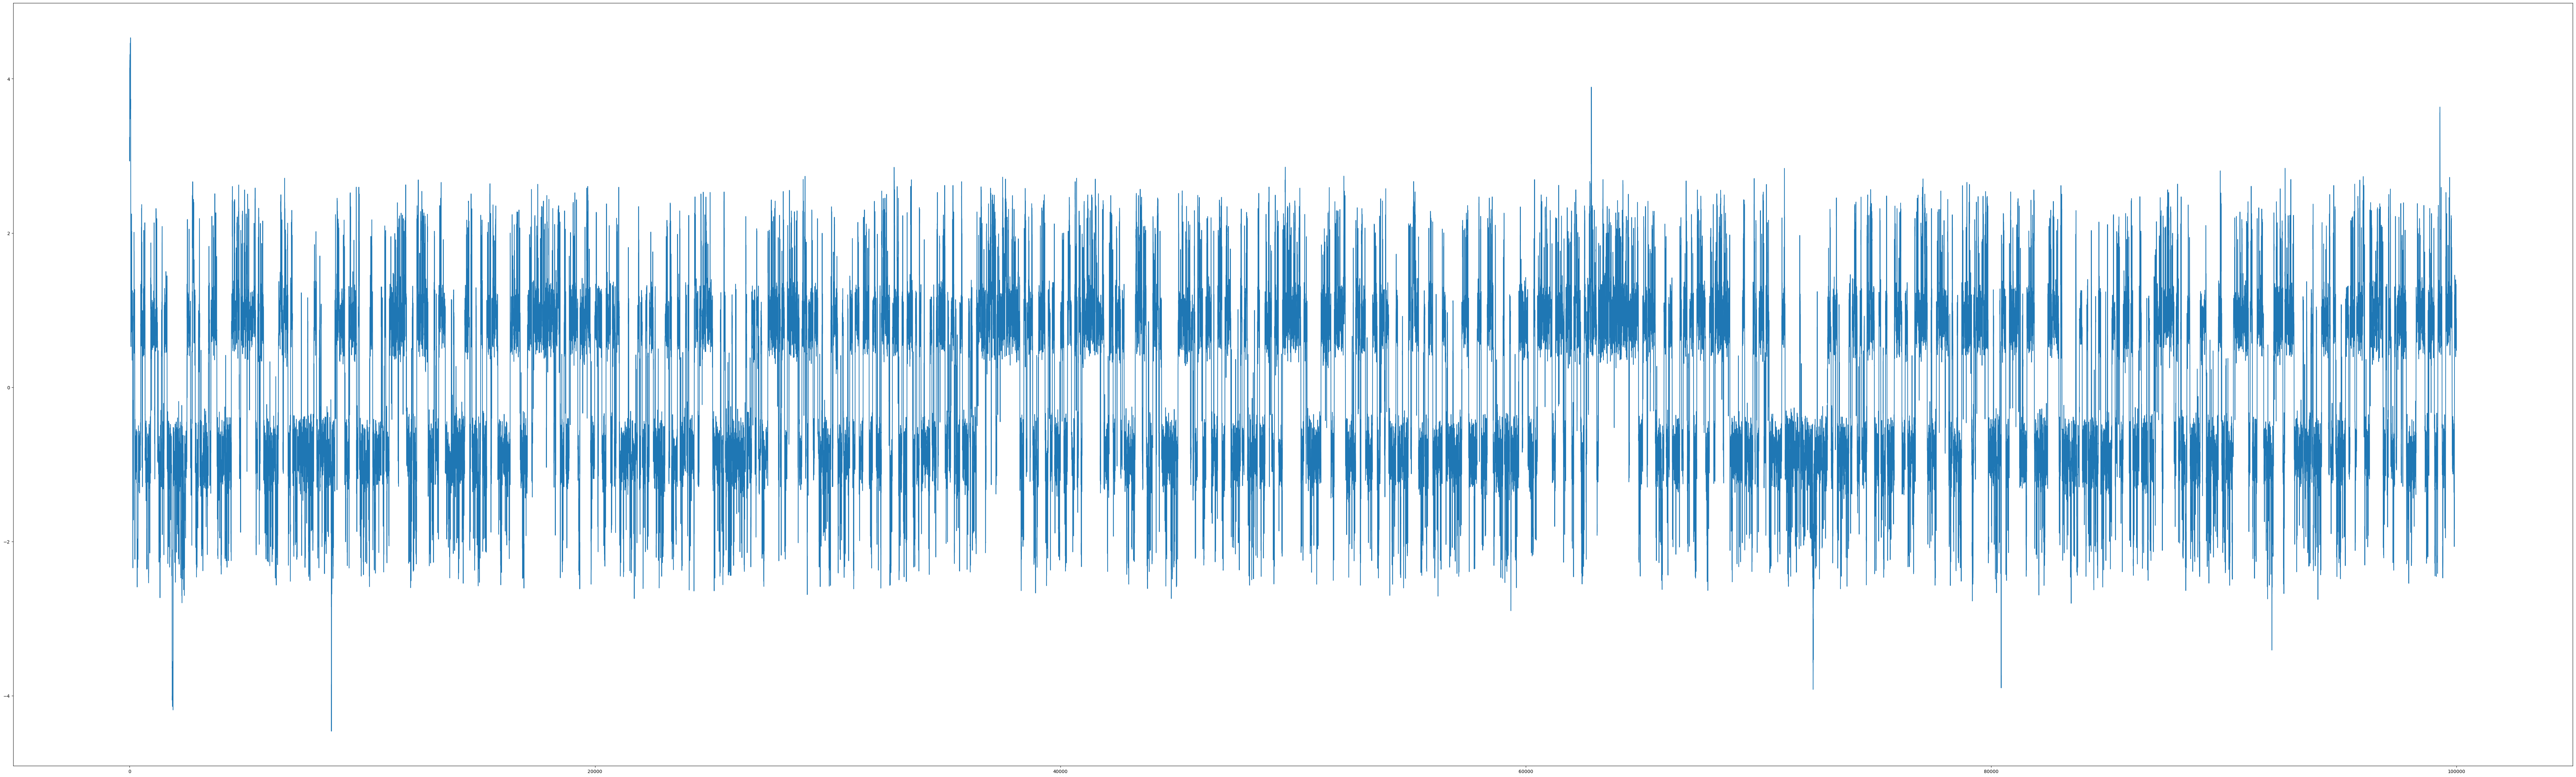

In [671]:
plt.figure(figsize=(100,30))
plt.plot([i for i in range(1,N+1)], HM)

(array([6.99676588e-05, 6.99676588e-05, 6.99676588e-05, 0.00000000e+00,
        0.00000000e+00, 1.02152782e-02, 5.80381729e-02, 1.00963332e-01,
        6.03471057e-02, 2.16549904e-02, 2.85852870e-01, 6.05710022e-01,
        4.59757486e-01, 1.07680227e-01, 2.13401359e-03, 1.77368015e-02,
        2.41808229e-01, 6.18584071e-01, 5.37631490e-01, 1.45917552e-01,
        1.58476747e-02, 9.28470832e-02, 8.30166271e-02, 2.82319503e-02,
        3.74326974e-03, 1.39935318e-04, 6.99676588e-05, 6.99676588e-05,
        1.39935318e-04, 3.49838294e-05]),
 array([-4.23162781, -3.94578146, -3.65993511, -3.37408876, -3.0882424 ,
        -2.80239605, -2.5165497 , -2.23070335, -1.944857  , -1.65901065,
        -1.37316429, -1.08731794, -0.80147159, -0.51562524, -0.22977889,
         0.05606747,  0.34191382,  0.62776017,  0.91360652,  1.19945287,
         1.48529922,  1.77114558,  2.05699193,  2.34283828,  2.62868463,
         2.91453098,  3.20037734,  3.48622369,  3.77207004,  4.05791639,
         4.34376

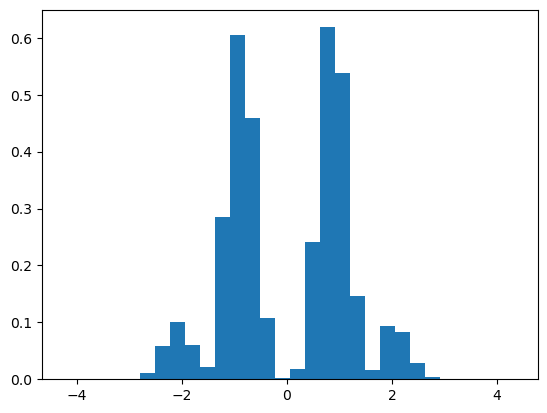

In [483]:
plt.hist(HM, bins = 30, density=True)

## 4. Compare theoratical plot ($\tilde{\pi}$, empirical density) and sample plot

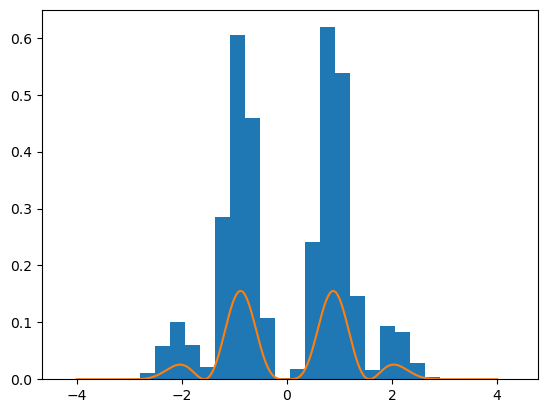

In [484]:
plt.hist(HM, bins = 30, density=True)
x = np.linspace(-4, 4, 1000)
y = [pi_tilde(x_) for x_ in x]
plt.plot(x, y)

## 5. c = 4

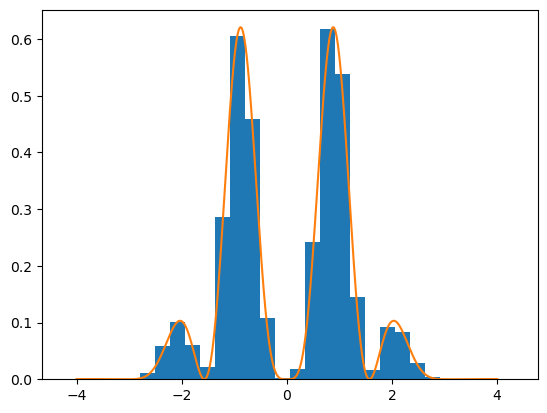

In [486]:
c = 4

plt.hist(HM, bins = 30, density=True)
x = np.linspace(-4, 4, 1000)
y = [c*pi_tilde(x_) for x_ in x]
plt.plot(x, y)

## 6. MC approximation of $\pi$

In [685]:
N = 10**5
HM = HM_algo(x0, alpha, N)
MC = np.sum([4*pi_tilde(x_)**2/N for x_ in HM])

In [681]:
np.sum(MC)

0.050619882073180376

# Exercise 4

In [654]:
#1. 

beta = 0.1
N = 60
A = [_ for _ in range(0,N)]

In [652]:
def ising(beta, size):
    A = [i for i in range(0,size)] #tuple x = (i,j) takes value in set A

    S = [[one_sample_uniform([-1, 1]) for _ in range(size)] for _ in range(size)] #s(i, j) in {-1,1}

    def delta_H(S, x): #x~y, x horizontal, y vertical, x is tuple input
        i, j = x
        return 2 * S[i][j] * np.sum(S[j])

    for _ in range(N):
        V = (one_sample_uniform(A), one_sample_uniform(A))#second for is first dimension i
        U = np.random.rand()
        if (U <= np.exp(-beta * delta_H(S, V))):
            S[V[0]][V[1]] *= -1 #replace S by Sx (Sx reversed sign of S)
        
    return S

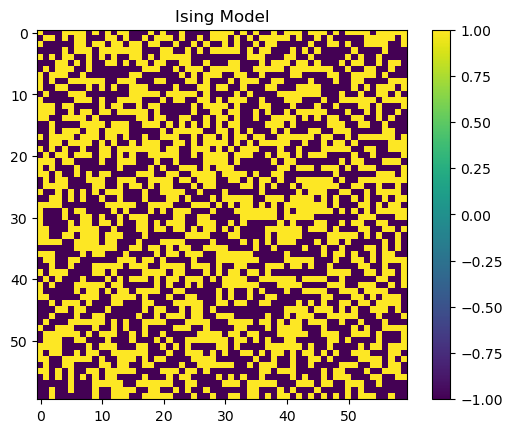

In [667]:
def plot_ising_model(ising_model):
    plt.imshow(ising_model)
    plt.title('Ising Model')
    plt.colorbar()
    plt.show()

ising_model = ising(beta, N)
plot_ising_model(ising_model)

# Exercise 6

In [4]:
mu = 0.03
v_ = 0.1
n = 10
c = 18
sigma = 0.1

Z = sample_normal(0, v_, n)
V = sample_normal(0, sigma, n)

In [35]:
#4.

def get_next_X(X): #list_X
    k = len(X)-1
    return (X[k]*(1+mu) + X[k]*sample_normal(0, v_, 1)[0])

def generate_X(x0, n):
    X = [x0] #k = 0
    for _ in range(n): #supposed to be n-1, but since k >= 1 we don't count x0
        X.append(get_next_X(X)) #append Xk+1
    return X 

def generate_Y(X, n):
    Y = []
    for _ in range(1,n+1): #k>=1
        Y.append(X[_] + sample_normal(0, sigma, 1)[0])
    return Y

In [36]:
X = generate_X(10, n)
X

[10,
 8.7633755648072,
 8.624403869078359,
 8.495329485189174,
 8.872683040155316,
 8.875298364141184,
 10.41899254508874,
 11.526087794174217,
 11.074243472470897,
 10.57553778064246,
 9.528570096627993]

In [37]:
N = 10**4
Y = generate_Y(X, n)
YN = [generate_Y(X, n) for _ in range(N)]

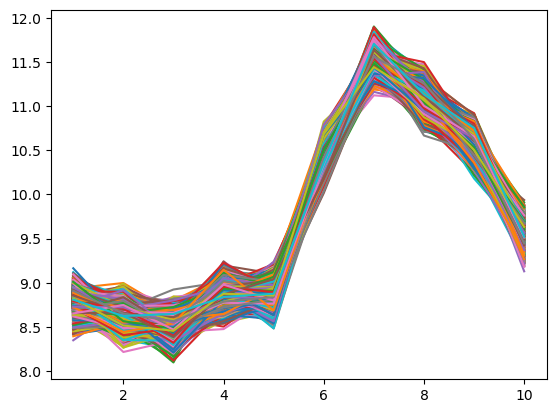

In [38]:
for j in range(N):
    plt.plot([_ for _ in range(1,len(YN[j])+1)], YN[j])

In [40]:
len(Y)

10